# Correlation & Simple Linear Regression Applied to a Virtual Used Car Lot 

Introduction: The data in this project is the year, age, and price of used cars bought from online. The data from this project is sourced from _________. I chose cars to include based on what the search results returned and tried to make sure I got a wide range of car years. 

In [94]:
car <- read.csv("DataShortProject1 - Tanisha Gupta.csv")

In [1]:
#View(car)

In [97]:
summary(car)

      age             miles            price      
 Min.   : 0.000   Min.   :  3.70   Min.   : 2.50  
 1st Qu.: 4.500   1st Qu.: 44.95   1st Qu.: 9.25  
 Median : 9.000   Median : 76.00   Median :15.60  
 Mean   : 9.742   Mean   : 82.37   Mean   :16.10  
 3rd Qu.:13.000   3rd Qu.:113.25   3rd Qu.:19.75  
 Max.   :27.000   Max.   :224.80   Max.   :32.00  

In [98]:
mean(car$age)

[1] 9.741935

In [99]:
sd(car$age)

[1] 7.215575

In [100]:
mean(car$miles)

[1] 82.37419

In [101]:
sd(car$miles)

[1] 52.86518

In [102]:
mean(car$price)

[1] 16.09677

In [103]:
sd(car$price)

[1] 7.746203

In [104]:
SSX1 <- sum((car$age - mean(car$age))^2)

In [105]:
SSX1

[1] 1561.935

In [106]:
SSX2 <- sum((car$miles - mean(car$miles))^2)

In [107]:
SSX2

[1] 83841.82

In [108]:
SSY <-  sum((car$price - mean(car$price))^2)

In [109]:
SSXY1 <- sum((car$price - mean(car$price))*(car$age - mean(car$age)))

In [110]:
SSXY1

[1] -1490.926

In [111]:
SSXY2 <- sum((car$price - mean(car$price))*(car$miles - mean(car$miles)))

In [112]:
SSXY2

[1] -10525.29

In [113]:
SSR1 <- SSXY1^2/SSX1

In [114]:
SSR1

[1] 1423.144

In [115]:
SSR2 <- SSXY2^2/SSX2

In [116]:
SSR2

[1] 1321.319

In [117]:
SSModel1 <- SSX1*SSY/SSXY1

In [118]:
SSModel1

[1] -1885.845

In [119]:
SSModel2 <- SSX2*SSY/SSXY2

In [120]:
SSModel2

[1] -14339.22

In [121]:
SSE1 <- SSY - SSR1

In [122]:
SSE1

[1] 376.9653

In [123]:
SSE2 <- SSY - SSR2

In [124]:
SSE2

[1] 478.7907

In [125]:
model1 <- lm(price ~ age, data = car)

In [126]:
model2 <- lm(price ~ miles, data = car)

In [127]:
summary(model1)


Call:
lm(formula = price ~ age, data = car)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3050 -1.7096 -0.2959  2.0360  9.3767 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 25.39582    1.09961   23.09  < 2e-16 ***
age         -0.95454    0.09123  -10.46 2.34e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.605 on 29 degrees of freedom
Multiple R-squared:  0.7906,	Adjusted R-squared:  0.7834 
F-statistic: 109.5 on 1 and 29 DF,  p-value: 2.338e-11


In [128]:
summary(model2)


Call:
lm(formula = price ~ miles, data = car)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.955  -2.338   0.628   2.874   6.180 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 26.43782    1.36703  19.340  < 2e-16 ***
miles       -0.12554    0.01403  -8.946 7.75e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.063 on 29 degrees of freedom
Multiple R-squared:  0.734,	Adjusted R-squared:  0.7248 
F-statistic: 80.03 on 1 and 29 DF,  p-value: 7.753e-10


These results make sense. The price should go down as the age goes up.  The price should also go down as the miles go up. 

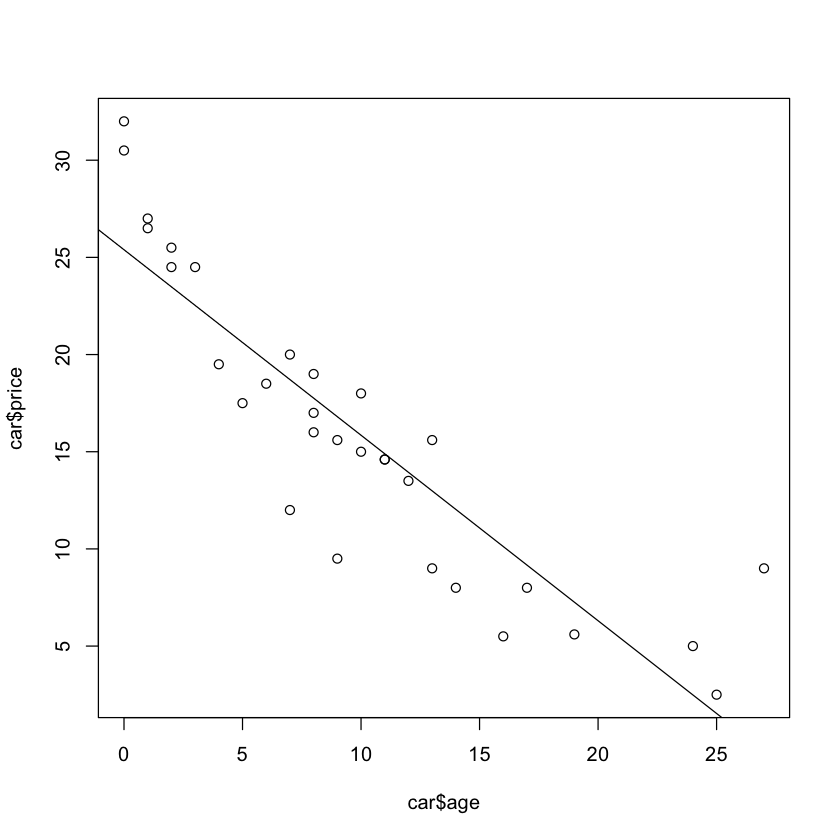

In [129]:
plot(car$age, car$price)
abline(lm(car$price ~ car$age))

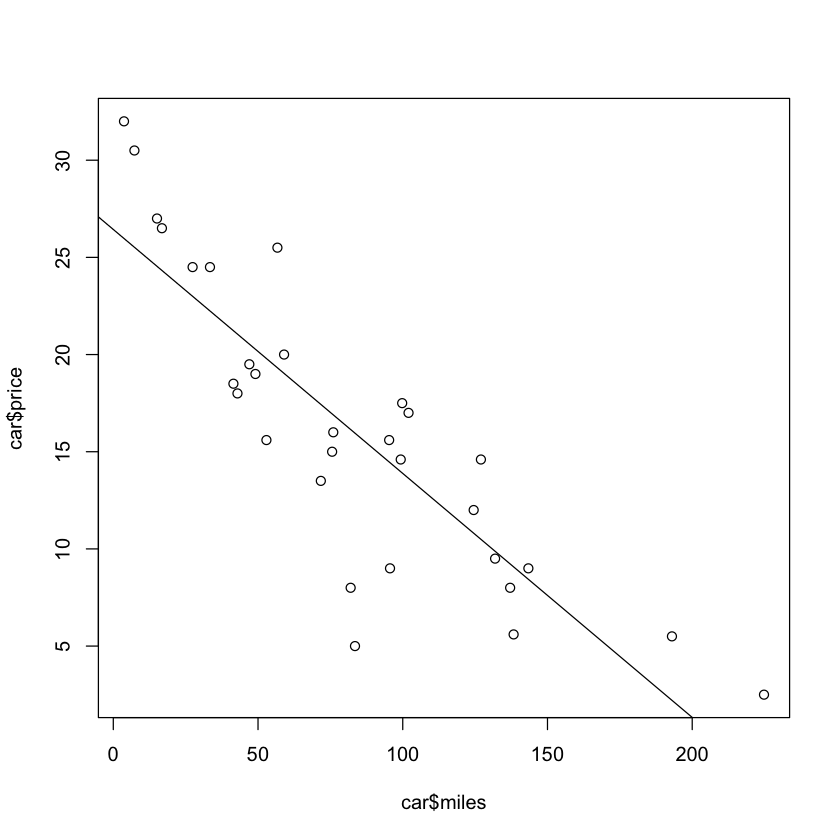

In [130]:
plot(car$miles, car$price)
abline(lm(car$price ~ car$miles))

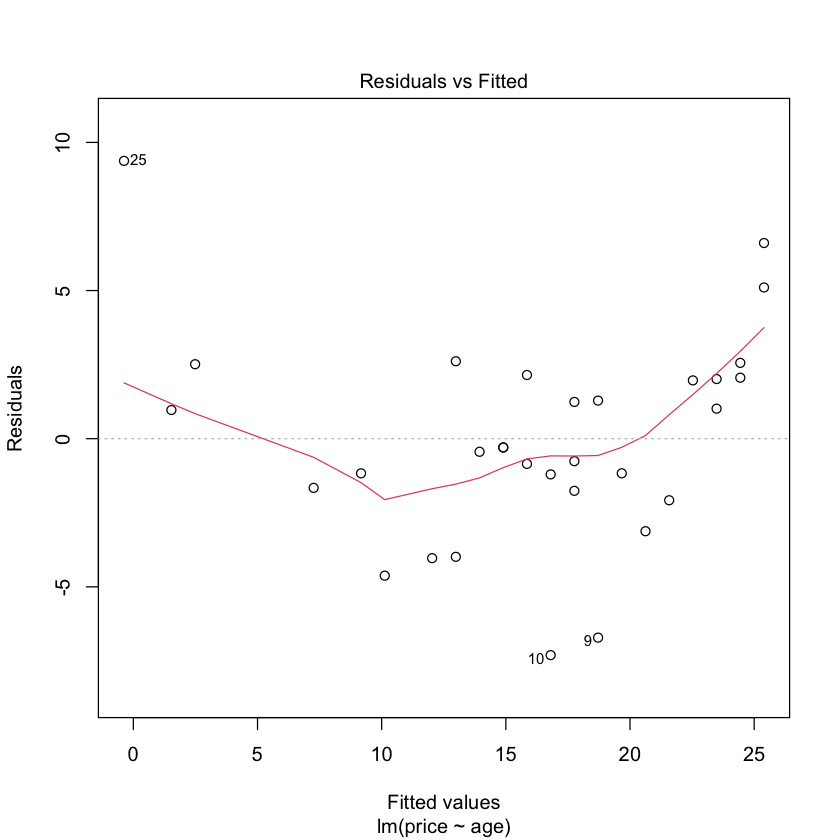

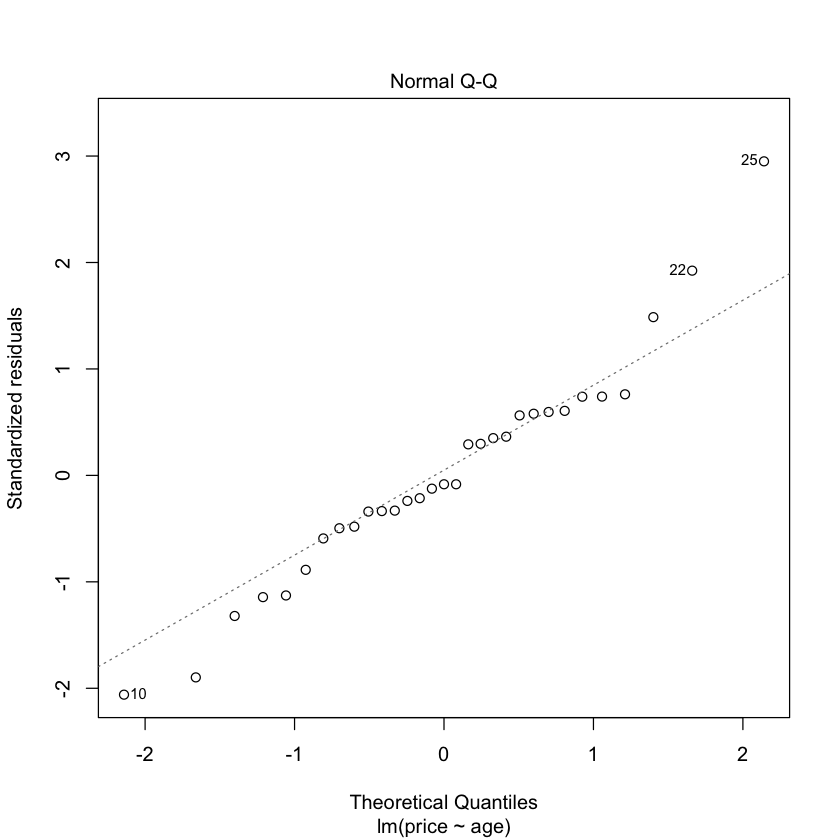

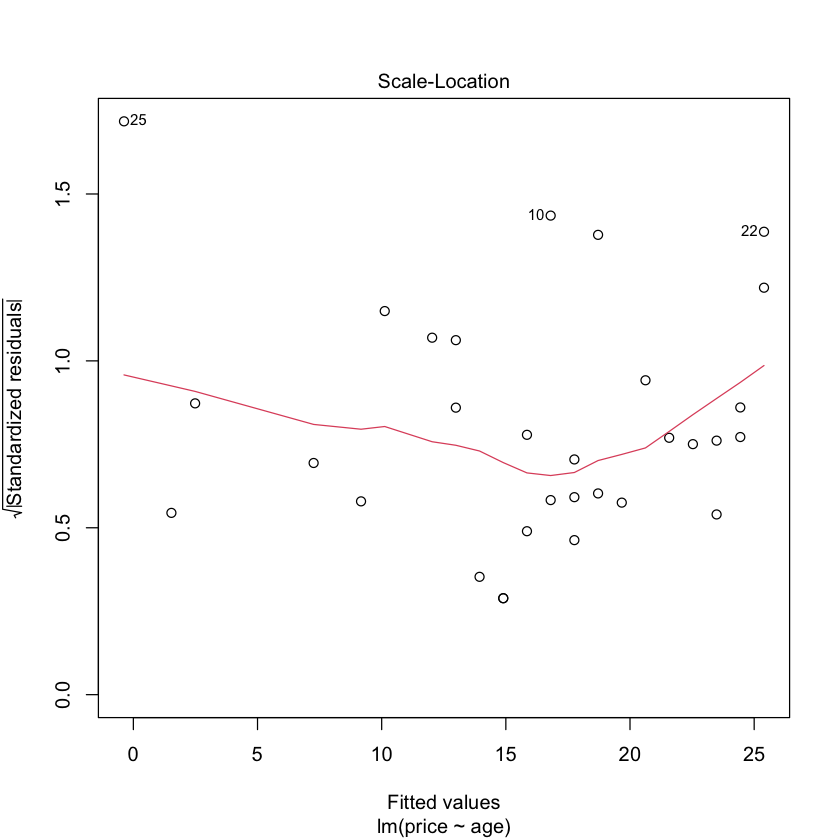

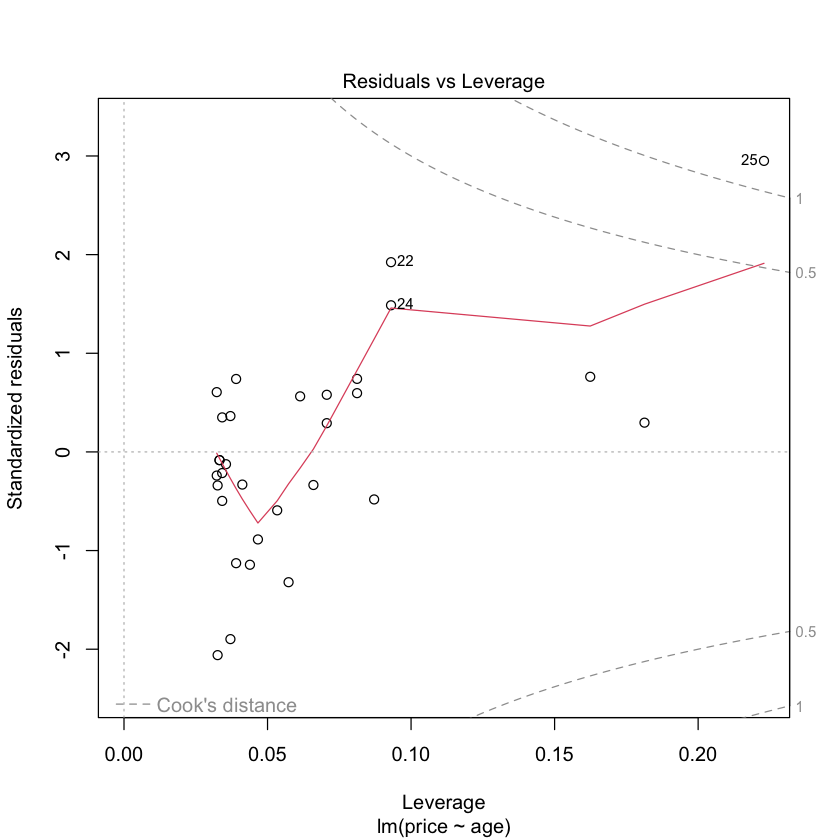

In [131]:
plot(model1)  

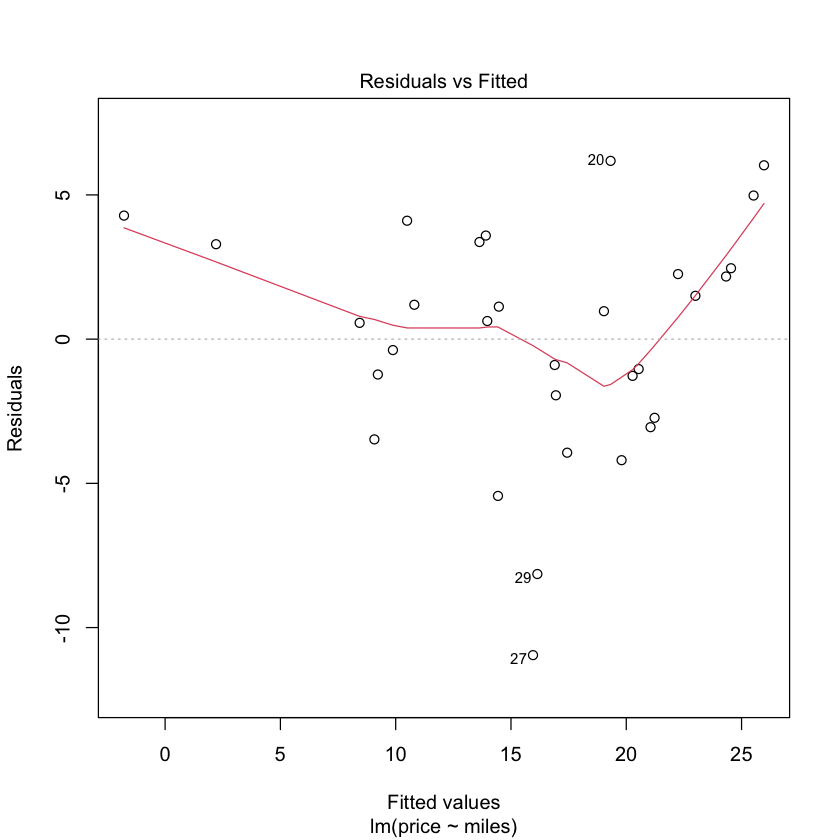

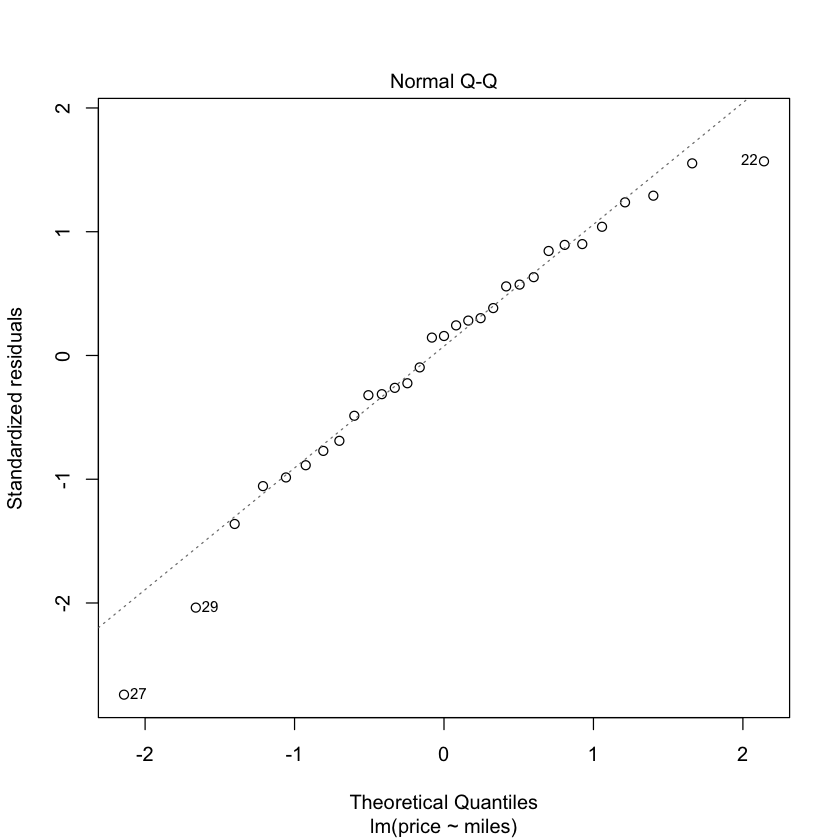

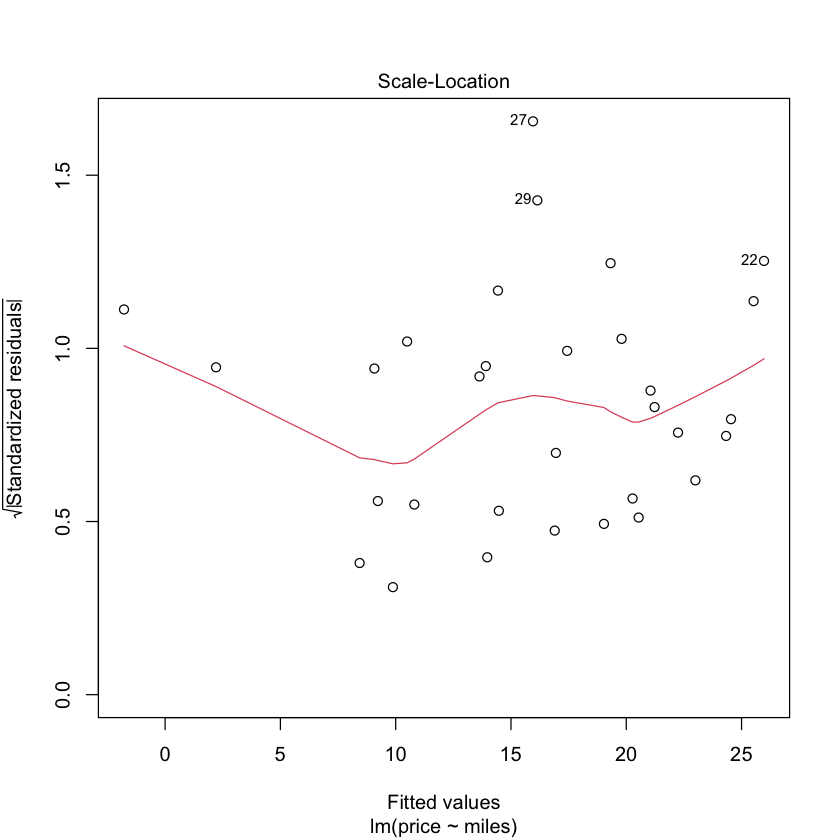

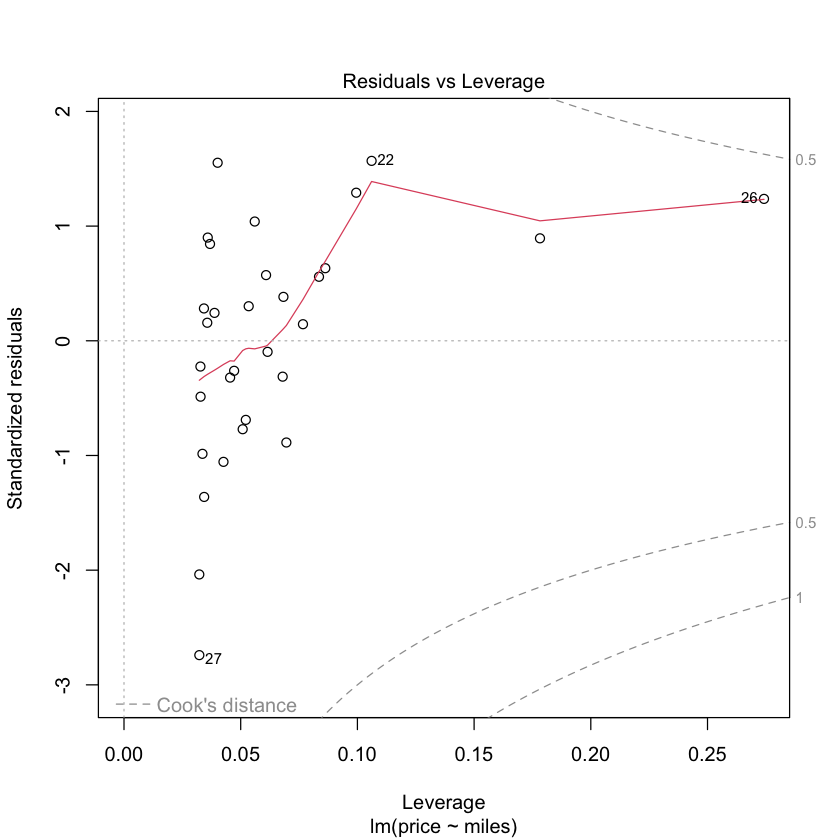

In [132]:
plot(model2)

In [133]:
standard_res_1 <- rstandard(model1)

In [134]:
car[25,]

,age,miles,price
,<int>,<dbl>,<dbl>
25,27,95.6,9


In [135]:
standard_res_2 <- rstandard(model2)

In [136]:
car[22,]

,age,miles,price
,<int>,<dbl>,<dbl>
22,0,3.7,32


In [137]:
standard_res_1[25]

25 
2.950341

In [138]:
standard_res_2[22]

22 
1.568753

In [139]:
lev_1 <- as.data.frame(hatvalues(model1))

In [140]:
lev_1[25,]

[1] 0.2229451

In [141]:
lev_2 <- as.data.frame(hatvalues(model2))

In [142]:
lev_2[22,]

[1] 0.1060831

In [143]:
#cooks_1 = cookd(model1)

ERROR: Error in cookd(model1): could not find function "cookd"


In [ ]:
#cooks_2 = cookd(model2)

The values of the residuals are not out of the ordinary. The values of the leverages are not above 2 either. 

In [144]:
confint(model1, level=0.9)

,5 %,95 %
(Intercept),23.527440,27.2641919
age,-1.109542,-0.7995323


In [145]:
confint(model2, level=0.9)

,5 %,95 %
(Intercept),24.115065,28.760585
miles,-0.149381,-0.101694


In [146]:
summary(model1)


Call:
lm(formula = price ~ age, data = car)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3050 -1.7096 -0.2959  2.0360  9.3767 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 25.39582    1.09961   23.09  < 2e-16 ***
age         -0.95454    0.09123  -10.46 2.34e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.605 on 29 degrees of freedom
Multiple R-squared:  0.7906,	Adjusted R-squared:  0.7834 
F-statistic: 109.5 on 1 and 29 DF,  p-value: 2.338e-11


In [147]:
summary(model2)


Call:
lm(formula = price ~ miles, data = car)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.955  -2.338   0.628   2.874   6.180 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 26.43782    1.36703  19.340  < 2e-16 ***
miles       -0.12554    0.01403  -8.946 7.75e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.063 on 29 degrees of freedom
Multiple R-squared:  0.734,	Adjusted R-squared:  0.7248 
F-statistic: 80.03 on 1 and 29 DF,  p-value: 7.753e-10


The correlation for both predictors is pretty strong. The p values are very low, the F statistic looks good, and the R squared is pretty close to 1. 

ERROR: Error in eval(predvars, data, env): object 'age' not found


In [ ]:
#variable_thing <- data.frame(thing=c(12))

In [149]:
predict(model1)

1          2          3          4          5          6          7 
14.8959046 17.7595167 15.8504420 17.7595167 19.6685915 12.9868298 13.9413672 
         8          9         10         11         12         13         14 
22.5322036 18.7140541 16.8049793 23.4867410 24.4412784 12.9868298 15.8504420 
        15         16         17         18         19         20         21 
16.8049793 17.7595167 14.8959046 21.5776663 24.4412784 23.4867410 20.6231289 
        22         23         24         25         26         27         28 
25.3958158 18.7140541 25.3958158 -0.3766935  1.5323812  2.4869186  7.2596055 
        29         30         31 
 9.1686803 10.1232177 12.0322924

In [150]:
predict(model1, interval='confidence')

,fit,lwr,upr
1,14.8959046,13.5508834,16.240926
2,17.7595167,16.3958397,19.123194
3,15.8504420,14.5251861,17.175698
4,17.7595167,16.3958397,19.123194
5,19.6685915,18.1714542,21.165729
6,12.9868298,11.5296031,14.444057
7,13.9413672,12.5515887,15.331146
8,22.5322036,20.7056490,24.358758
9,18.7140541,17.2942985,20.133810
10,16.8049793,15.4733835,18.136575


In [151]:
predict(model2)

1         2         3         4         5         6         7         8 
10.494562 13.632999 16.947190 16.896975 21.228018  8.435747 17.436786 22.998097 
        9        10        11        12        13        14        15        16 
10.808406  9.879428 22.244872 24.328795 19.796891 21.052266 14.474101 20.273933 
       17        18        19        20        21        22        23        24 
13.971951 20.537562 24.542208 19.319848 13.909182 25.973336 19.031112 25.521401 
       25        26        27        28        29        30        31 
14.436439 -1.783006 15.955443  9.075988 16.143750  2.209087  9.226633

In [152]:
predict(model2, interval='confidence')

,fit,lwr,upr
1,10.494562,8.527802,12.461322
2,13.632999,12.037682,15.228317
3,16.947190,15.442009,18.452370
4,16.896975,15.393234,18.400715
5,21.228018,19.329616,23.126421
6,8.435747,6.134581,10.736913
7,17.436786,15.913099,18.960472
8,22.998097,20.826200,25.169994
9,10.808406,8.887598,12.729213
10,9.879428,7.818323,11.940533


The car seems to be free at 25 years old. That doesn't seem about right, perhaps a different kind of model, not a linear one would be better suited to this prediction. 

The linear model was acceptable up until a certain point. However, the zero/free point of should not exist, perhaps once we get closer to that point we should shift to a different kind of model? I htink the most interesting point was the one that had 0 years as it was a 2022 corolla. That was also the one with the highest residual for the group. In conclusion, the linear model was good, but I think another model could potentially have been better. Both age and miles were very good predictors of the price as well. 